# Install and load library

In [ ]:
!pip install torch torchvision torchaudio
!pip install torch-geometric

import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import torch
from torch import Tensor
import torch_geometric
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid
import networkx as nx
from networkx.algorithms import community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.1 MB/s eta 0:00:00


# Load dataset - EDA and visualization

The Cora dataset is a citation network of 2,708 machine-learning papers, organized into seven distinct classes. These papers are interlinked by 5,429 citations, forming a directed graph that maps out how papers cite each other. Each paper is represented by a binary word vector, derived from a dictionary of 1,433 unique words, indicating the presence or absence of specific words in the paper.



**Features and Labels**

Each paper in the Cora dataset is described by a binary word vector, which serves as the feature set for the dataset. The presence (1) or absence (0) of each word from a dictionary of 1,433 unique words is recorded in this vector. This high-dimensional feature space captures the content of each paper, enabling detailed analysis and classification.

The labels in the Cora dataset correspond to the seven classes of machine learning topics:

*  Case Based
*  Genetic Algorithms
*  Neural Networks
*  Probabilistic Methods
*  Reinforcement Learning
*  Rule Learning
*  Theory

In [ ]:
import torch
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

print(type(data))

# Print basic dataset information
print(f'Number of Nodes: {data.num_nodes}')
print(f'Number of Edges: {data.num_edges}')
print(f'Number of Features: {data.num_node_features}')
print(f'Number of Classes: {dataset.num_classes}')
print(f'Node Features Shape: {data.x.shape}')
print(f'Edge Index Shape: {data.edge_index.shape}')
print(f'Node Labels Shape: {data.y.shape}')

print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')

G = to_networkx(data, to_undirected=True)
degrees = [val for (node, val) in G.degree()]
display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))
print(len(degrees))
print(sum(degrees))

Processing...


<class 'torch_geometric.data.data.Data'>
Number of Nodes: 2708
Number of Edges: 10556
Number of Features: 1433
Number of Classes: 7
Node Features Shape: torch.Size([2708, 1433])
Edge Index Shape: torch.Size([2, 10556])
Node Labels Shape: torch.Size([2708])
Average node degree: 3.90


Done!


,count,mean,std,min,25%,50%,75%,max
0,2708.0,3.9,5.23,1.0,2.0,3.0,5.0,168.0


2708
10556


*  Number of Nodes: There are 2,708 scientific papers in the dataset, each represented as a node.

*  Number of Edges: There are 10,556 citation links (edges) connecting these papers. An edge indicates that one paper cites another.

*  Number of Features: Each paper is represented by 1,433 features, which are derived from the text of the papers (often using a bag-of-words model).

*  Number of Classes: The papers are categorized into 7 different classes or topics.

*  Node Features Shape: The shape of the node features array is torch.Size([2708, 1433]), indicating that there are 2,708 nodes, each with 1,433 features.

*  Edge Index Shape: The shape of the edge index array is torch.Size([2, 10556]), meaning that the citation relationships are stored in a format where the first row represents the source nodes and the second row represents the target nodes for 10,556 edges.

*  Node Labels Shape: The shape of the node labels array is torch.Size([2708]), indicating that there is a label for each of the 2,708 nodes, corresponding to their topic classes.

*  Average Node Degree: The average number of edges (citations) per node (paper) is 3.90, meaning that, on average, each paper cites approximately 4 other papers.



*   Count: There are 2,708 nodes (papers) in the dataset.
*   Mean: On average, each node has 3.9 edges (citations).
*  Standard Deviation (std): The standard deviation of 5.23 indicates the variability in the number of edges per node. A higher value shows there is a wide range in how many citations papers have.
*  Minimum: The minimum number of edges for any node is 1, meaning at least one paper cites at least one other paper.
*  25th Percentile (25%): 2 indicates that 25% of the papers have 2 or fewer citations.
*  Median (50%): The median number of edges is 3, meaning that half of the papers have 3 or fewer citations.
*  75th Percentile (75%): 5 shows that 75% of the papers have 5 or fewer citations.
*  Maximum: The maximum number of edges for any node is 168, indicating that the most cited paper has been referenced by 168 other papers.




   0     1     2     3     4     5     6     7     8     9     ...  1423  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   1424  1425  1426  1427  1428  1429  1430  1431  1432  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1433 columns]
3    818
4    426
2    418
0    351
5    298
1    217
6    180
Name: count, dtype: int64


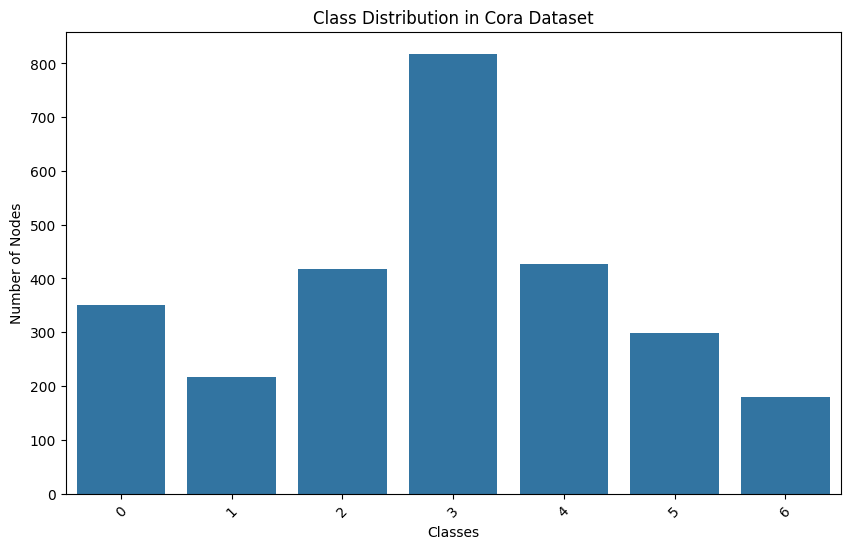

In [ ]:
# Convert Node Features to a DataFrame
node_features = pd.DataFrame(data.x.numpy())
#Convert Node Labels to a Series
node_labels = pd.Series(data.y.numpy())

# Show the first few rows of node features
print(node_features.head())

# Show class distribution
class_distribution = node_labels.value_counts()
print(class_distribution)

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title("Class Distribution in Cora Dataset")
plt.xlabel("Classes")
plt.ylabel("Number of Nodes")
plt.xticks(rotation=45)
plt.show()

The distribution indicates that Class 3 is the most populated category, suggesting it may be a more prominent area of research within the dataset.
The other classes have a more balanced but lower distribution, indicating less research activity or fewer papers in those areas.

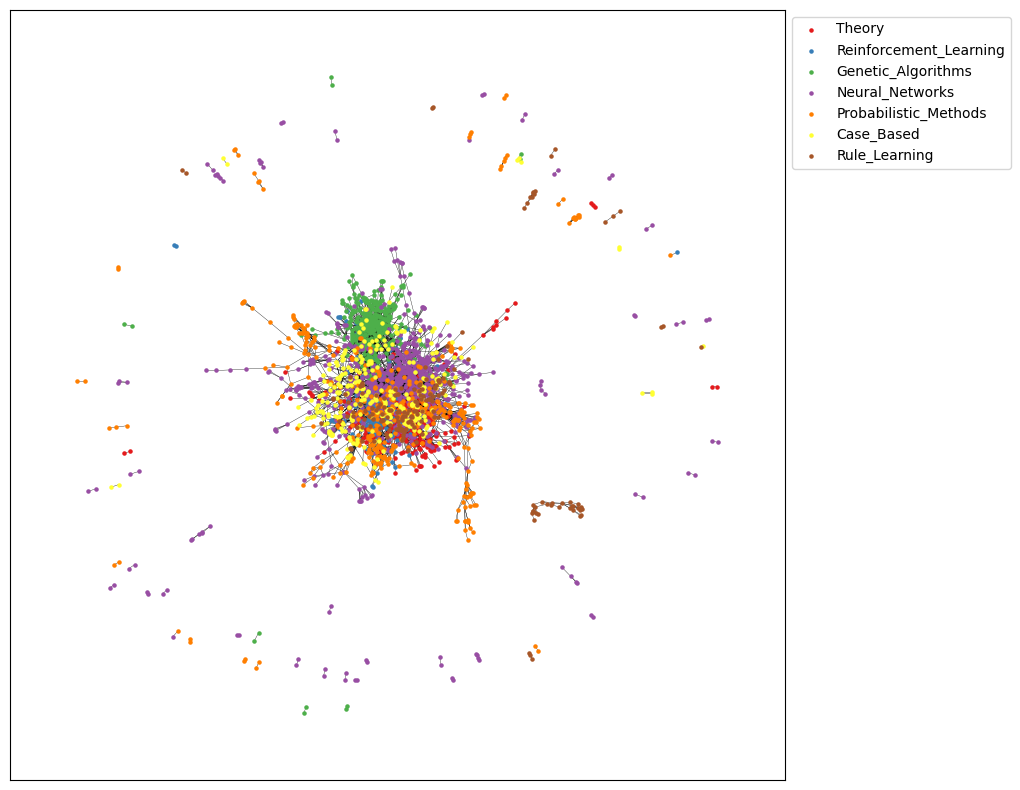

In [ ]:
label_dict = {
    0: "Theory",
    1: "Reinforcement_Learning",
    2: "Genetic_Algorithms",
    3: "Neural_Networks",
    4: "Probabilistic_Methods",
    5: "Case_Based",
    6: "Rule_Learning"}
data.y[:10]


node_color = []
nodelist = [[], [], [], [], [], [], []]
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628']
labels = data.y
for n, i in enumerate(labels):
    node_color.append(colorlist[i])
    nodelist[i].append(n)
pos = nx.spring_layout(G, seed = 42)
plt.figure(figsize = (10, 10))
labellist = list(label_dict.values())
for num, i in enumerate(zip(nodelist, labellist)):
    n, l = i[0], i[1]
    nx.draw_networkx_nodes(G, pos, nodelist=n, node_size = 5, node_color = colorlist[num], label=l)
nx.draw_networkx_edges(G, pos, width = 0.25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

The central cluster of nodes suggests that many papers are closely related or cite each other, indicating a strong connection within certain topics.
The scattered nodes around the periphery may represent papers that are less connected or belong to less common categories.

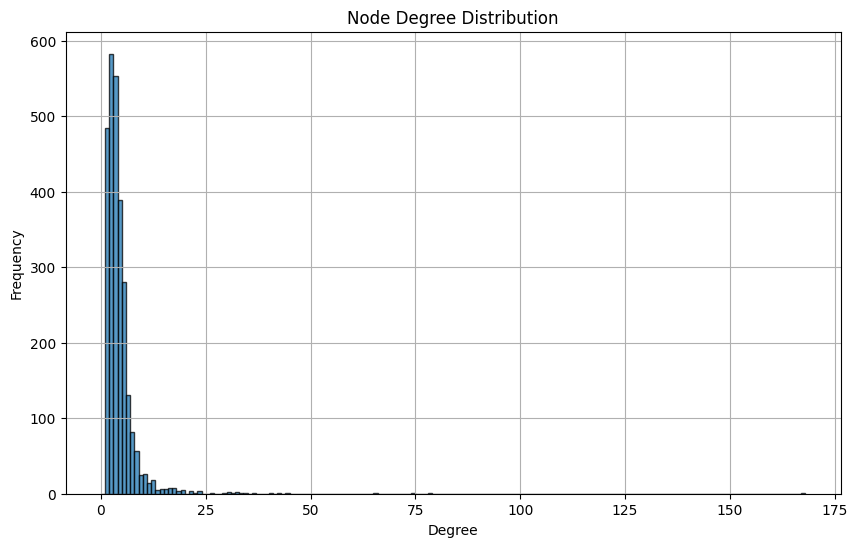

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.from_edgelist(data.edge_index.t().tolist())


degrees = [deg for node, deg in G.degree()]

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(max(degrees) + 1), alpha=0.75, edgecolor='black')
plt.title('Node Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The distribution is heavily right-skewed, meaning that while most papers have a low degree (few citations), there are a few papers with a very high degree (many citations).
This suggests that a small number of papers are highly influential or widely cited, while the majority are cited less frequently.

# data processing

In [ ]:
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    with torch.no_grad():
        out = model(data)
        pred = out.argmax(dim=1)
        test_correct = pred[data.test_mask] == data.y[data.test_mask]
        test_acc = test_correct.sum().item() / data.test_mask.sum().item()
        return test_acc

**train() Function:**
Set Model to Training Mode

**model.train():** puts the model into training mode, enabling behaviors like dropout.

**Clear Previous Gradients**: optimizer.zero_grad() resets the gradients from the previous iteration to avoid accumulation.

**Forward Pass:** out = model(data) : passes the input data through the model to obtain predictions.

**Compute Loss:**
loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask]) calculates the negative log likelihood loss using the model's output and the true labels for the training data.

**Backpropagation:**
loss.backward() computes the gradients of the loss with respect to the model parameters.

**Update Weights:**
optimizer.step() updates the model parameters using the computed gradients.

**Return Loss:**
return loss.item() returns the loss value as a Python float for monitoring purposes.

**Set Model to Evaluation Mode:**
model.eval() sets the model to evaluation mode, disabling behaviors like dropout, which should not occur during testing.

**No Gradient Calculation:**
with torch.no_grad(): specifies that gradients should not be tracked, saving memory and computation during evaluation.

**Forward Pass for Testing:**
out = model(data) passes the input data through the model to get predictions.

**Obtain Predictions:**
pred = out.argmax(dim=1) gets the predicted class for each node by taking the index of the maximum predicted probability.

**Calculate Correct Predictions:**
test_correct = pred[data.test_mask] == data.y[data.test_mask] compares predictions to the true labels for the test data.

**Calculate Accuracy:**
test_acc = test_correct.sum().item() / data.test_mask.sum().item() computes the test accuracy by dividing the number of correct predictions by the total number of test samples.

**Return Accuracy:**
return test_acc returns the accuracy value as a float.

# GNN model

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch.optim as optim


class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(in_channels=dataset.num_node_features, hidden_channels=16, out_channels=dataset.num_classes).to(device)
data = data.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

**class GCN(torch.nn.Module):**
 Defines a new class GCN that inherits from torch.nn.Module, representing a graph convolutional network model.

**def __init__(self, in_channels, hidden_channels, out_channels):**
The constructor initializes the model.

**Parameters:**

*  in_channels: Number of input features per node.
*  hidden_channels: Number of features after the first GCN layer (hidden layer).
*  out_channels: Number of output features (final class predictions).

**super(GCN, self).__init__():**
Calls the constructor of the parent class (torch.nn.Module) to properly initialize the base class.

**self.conv1 = GCNConv(in_channels, hidden_channels):**
Initializes the first graph convolution layer (conv1) which transforms the input features (from in_channels to hidden_channels).

**Model and Data Initialization**


**model = GCN(in_channels=dataset.num_node_features, hidden_channels=16, out_channels=dataset.num_classes).to(device):**
*  Creates an instance of the GCN class.
*  Sets in_channels to the number of features per node in the dataset, hidden_channels to 16, and out_channels to the number of classes in the dataset.
*  Moves the model to the specified computing device (e.g., CPU or GPU) using .to(device).

**data = data.to(device):**
 Moves the graph data (node features, edges, etc.) to the same device as the model for efficient computation.

**optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4):**
Initializes the Adam optimizer for training the model.

**Parameters:**
*  model.parameters(): Specifies the model parameters to optimize.
*  lr=0.01: Sets the learning rate for weight updates.
*  weight_decay=5e-4: Applies L2 regularization to help prevent overfitting.

In [ ]:
for epoch in range(2000):
    loss = train()
    if epoch % 10 == 0:
        acc = test()
        print(f'Epoch {epoch:03d}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')

Epoch 000, Loss: 1.9460, Test Accuracy: 0.1470
Epoch 010, Loss: 1.8569, Test Accuracy: 0.6730
Epoch 020, Loss: 1.7050, Test Accuracy: 0.7610
Epoch 030, Loss: 1.5005, Test Accuracy: 0.7640
Epoch 040, Loss: 1.3017, Test Accuracy: 0.7900
Epoch 050, Loss: 1.1113, Test Accuracy: 0.8000
Epoch 060, Loss: 0.9438, Test Accuracy: 0.7980
Epoch 070, Loss: 0.7865, Test Accuracy: 0.8040
Epoch 080, Loss: 0.6898, Test Accuracy: 0.8080
Epoch 090, Loss: 0.5771, Test Accuracy: 0.8060
Epoch 100, Loss: 0.5213, Test Accuracy: 0.8060
Epoch 110, Loss: 0.4884, Test Accuracy: 0.8040
Epoch 120, Loss: 0.4546, Test Accuracy: 0.8100
Epoch 130, Loss: 0.4354, Test Accuracy: 0.7990
Epoch 140, Loss: 0.3944, Test Accuracy: 0.8060
Epoch 150, Loss: 0.3845, Test Accuracy: 0.8110
Epoch 160, Loss: 0.3556, Test Accuracy: 0.7980
Epoch 170, Loss: 0.3750, Test Accuracy: 0.8010
Epoch 180, Loss: 0.3293, Test Accuracy: 0.8060
Epoch 190, Loss: 0.3255, Test Accuracy: 0.8080
Epoch 200, Loss: 0.2910, Test Accuracy: 0.7990
Epoch 210, Lo

**for epoch in range(2000):**
Iterates through 2000 epochs (training iterations). Each epoch represents one complete pass through the training data.

**loss = train():**
Calls the train() function to perform one training iteration. This function computes the loss for that epoch and updates the model's parameters. The computed loss is stored in the variable loss.


**Testing and Printing Results:**

**acc = test():**
Calls the test() function to evaluate the model's performance on the test dataset, computing the accuracy. The accuracy is stored in the variable acc.

**print(f'Epoch {epoch:03d}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}'):**
Prints the current epoch number, the loss from training, and the test accuracy, formatted to display:
The epoch as a three-digit number (epoch:03d).
The loss and accuracy rounded to four decimal places (.4f).

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate():
    model.eval()
    with torch.no_grad():
        out = model(data)
        pred = out.argmax(dim=1)
        test_correct = pred[data.test_mask] == data.y[data.test_mask]
        test_acc = test_correct.sum().item() / data.test_mask.sum().item()

        y_true = data.y[data.test_mask].cpu().numpy()
        y_pred = pred[data.test_mask].cpu().numpy()

        conf_matrix = confusion_matrix(y_true, y_pred)
        class_report = classification_report(y_true, y_pred, target_names=[f'Class {i}' for i in range(dataset.num_classes)])

        print(f'Test Accuracy: {test_acc:.4f}')
        print('Confusion Matrix:')
        print(conf_matrix)
        print('Classification Report:')
        print(class_report)

evaluate()

Test Accuracy: 0.8050
Confusion Matrix:
[[ 99   4   2   6   6   2  11]
 [  3  79   3   4   0   1   1]
 [  3  11 123   6   0   1   0]
 [ 16  13   4 248  26   3   9]
 [  8   2   0   7 123   8   1]
 [  9   2   4   1   0  78   9]
 [  5   1   0   1   0   2  55]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.69      0.76      0.73       130
     Class 1       0.71      0.87      0.78        91
     Class 2       0.90      0.85      0.88       144
     Class 3       0.91      0.78      0.84       319
     Class 4       0.79      0.83      0.81       149
     Class 5       0.82      0.76      0.79       103
     Class 6       0.64      0.86      0.73        64

    accuracy                           0.81      1000
   macro avg       0.78      0.81      0.79      1000
weighted avg       0.82      0.81      0.81      1000



The model performs well overall, with a test accuracy of 80.50%. The confusion matrix and classification report indicate varying performance across classes, with Class 2 and Class 3 showing the highest precision and recall. Class 6 has the lowest precision, suggesting it may be more challenging to classify correctly. The macro and weighted averages provide a comprehensive view of the model's performance across all classes, indicating a balanced performance overall.